# Import modules and define functions

In [1]:
import glob
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel 
import xarray as xr 

Calculates daily climatology with a 15-day rolling window 

In [2]:
def daily_climatology (tmax):
    
    rolling_mean_dailytmax = tmax.rolling(time=15, center=True).mean()
    
    climatology = rolling_mean_dailytmax.groupby('time.dayofyear').mean('time')
    
    return climatology 

Calculates daily climatology of 90th percentile with a 15-day rolling window 

In [3]:
def climatology_90 (tmax):
    rolling_mean_dailytmax = tmax.rolling(time=15, center=True).mean()
    percentile_90 = rolling_mean_dailytmax.groupby('time.dayofyear').quantile(0.9)
    
    return percentile_90

Identifies consecutive days on which the daily tmax exceeded the threshold 

In [4]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

Filters out events that lasted for a minimum of 3 days and returns day of the year and the duration of an event #doesn't work as expected 

In [5]:
def find_heat(x):
    if x.size >= 3:
        return x[0], x.size

In [6]:
def duration (events):
    return events[0], events.size   #problem with this function is that there is no iteration 

In [7]:
def duration2 (events):
    return [(x[0], x.size) for x in events]

# Opening yearly ERA5 surface Tmax files and dropped leap days

In [8]:
files = sorted(glob.glob('/g/data/e14/cp3790/Charuni/ERA5-new/era5_dailytmax_*.nc'))

#Slice the data for single lat lon in NSW
era5_dailytmax_aus = xr.open_mfdataset(files, combine='by_coords').sel(time=slice('1982-12-25', '2013-01-07'), longitude=141.25, latitude=-33.75).load()
daily_tmax = era5_dailytmax_aus["dmax"].sel(time=~((era5_dailytmax_aus["dmax"].time.dt.month == 2) & (era5_dailytmax_aus["dmax"].time.dt.day == 29)))
daily_tmax.attrs['units'] = 'deg C'

# Code

## For single year

Calculate daily mean climatology and 90th percentile 

In [9]:
daily_mean = daily_climatology (daily_tmax)
threshold = climatology_90 (daily_tmax)

Select one year (2010 in this case) and compare each day of the year against the corresponding threshold value and return boolean 1s and 0s.

The days on which the daily tmax exceeded the threshold are then filtered out.

Consecutive days are identified 

In [10]:
year_2010 = daily_tmax.sel(time='2010')
heatwave_days = (year_2010.groupby('time.dayofyear') > threshold).astype(int)
heatwave_events = np.where(heatwave_days==1)
counters = consecutive(heatwave_events[0].tolist())

Events that last for at least 3 consecutive days are filtered and assigned to new array 'hottest' and gives us the start day of event and the number of days 

In [11]:
hottest_single = [(x[0], x.size) for x in counters if x.size >= 3]

AttributeError: Unknown property cmap

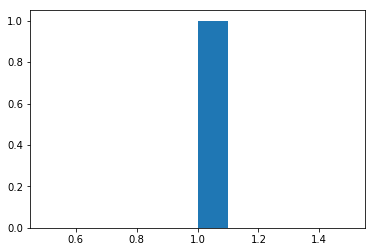

In [12]:
#heatwave_days.sel(time='2010-12-30').plot(cmap=plt.cm.get_cmap('YlOrRd', 2), 
            vmin=0, vmax=1,
            cbar_kwargs={'ticks':[0, 1]})

## For multiple years 

In [18]:
multiple_years = daily_tmax.sel(time=slice('2010', '2012'))

In [16]:
years = ['2010', '2011', '2012']
for year in years: # loop through the number of files I would like
    heatwave_days = (g/data/e14/cp3790/Charuni/ERA5-new/era5_dailytmax_*.nc.groupby('time.dayofyear') > threshold).astype(int)

SyntaxError: invalid syntax (<ipython-input-16-1f68087b756d>, line 5)

In [14]:
multiple_years.loc['2010-01-01':'2010-12-31']

<xarray.DataArray 'dmax' (time: 365)>
array([38.33358  , 25.692438 , 25.753778 , 30.217737 , 35.434013 ,
       34.854424 , 35.16604  , 38.79531  , 41.917656 , 43.273796 ,
       42.83303  , 39.292564 , 26.935572 , 28.322382 , 32.8525   ,
       34.65261  , 24.126429 , 24.429926 , 27.395685 , 37.05169  ,
       41.265404 , 42.96218  , 30.261316 , 32.87188  , 36.086266 ,
       36.39785  , 35.06594  , 34.655846 , 31.75146  , 37.32778  ,
       38.767845 , 37.028465 , 35.311333 , 31.772303 , 26.93847  ,
       26.192041 , 28.185816 , 35.399742 , 36.724022 , 37.118523 ,
       38.11541  , 38.94039  , 30.610102 , 31.045527 , 31.241938 ,
       30.577356 , 33.890495 , 35.54705  , 34.103294 , 35.67147  ,
       38.045006 , 39.493675 , 30.858912 , 25.635492 , 29.559198 ,
       33.613853 , 37.116875 , 34.46505  , 29.03866  , 25.799463 ,
       29.77151  , 31.525263 , 22.720545 , 28.636652 , 21.385096 ,
       24.133142 , 23.540003 , 21.438257 , 20.778223 , 23.946283 ,
       27.820642 , 29.562372 , 29.816095 , 32.74926  , 34.01101  ,
       34.331566 , 34.24758  , 34.609306 , 32.95156  , 30.897821 ,
       26.678888 , 27.38177  , 29.005213 , 32.372124 , 34.144737 ,
       35.111595 , 33.522423 , 25.604029 , 23.82284  , 24.537714 ,
       25.896265 , 25.586634 , 23.97735  , 25.925928 , 31.20431  ,
       22.714777 , 24.87655  , 22.83529  , 20.532618 , 21.669123 ,
       18.548822 , 18.166895 , 18.191004 , 19.35531  , 19.844751 ,
       23.677027 , 28.054346 , 28.67544  , 29.578333 , 29.430017 ,
       28.729212 , 29.884241 , 30.92251  , 21.689508 , 19.683466 ,
       21.611658 , 20.957178 , 20.400965 , 19.798426 , 19.844751 ,
       23.930231 , 23.2102   , 25.533472 , 23.74972  , 17.469263 ,
       20.255243 , 21.474482 , 22.770502 , 23.26974  , 24.243189 ,
       16.56109  , 15.731623 , 16.282679 , 17.695826 , 18.536829 ,
       19.880854 , 17.607508 , 18.913141 , 19.642756 , 19.911554 ,
       19.508356 , 18.951532 , 19.095545 , 19.034113 , 15.1748295,
       17.793756 , 16.99502  , 18.139368 , 14.942499 , 16.346033 ,
       16.69549  , 15.92486  , 16.863611 , 16.836329 , 16.010553 ,
       15.802149 , 14.255732 , 12.882654 , 14.341425 , 15.034784 ,
       14.869226 , 14.861444 , 13.597437 , 13.057947 , 12.312006 ,
       15.145807 , 20.077173 , 16.686365 , 16.974634 , 17.654352 ,
       17.297937 , 16.267633 , 15.68725  , 16.976557 , 20.87765  ,
       15.106836 , 12.707392 , 11.548548 , 13.57406  , 14.041498 ,
       13.924646 , 13.257959 , 12.194757 , 12.889704 , 12.509546 ,
       11.048395 , 12.836237 , 14.513178 , 14.307276 , 16.25152  ,
       17.162256 , 16.326746 , 16.130762 , 18.247248 , 15.433832 ,
       14.540918 , 13.588587 , 13.543055 , 14.883417 , 12.903559 ,
       13.61828  , 14.036036 , 14.37063  , 13.8380375, 13.182703 ,
       14.877497 , 15.433832 , 15.90307  , 16.534632 , 17.837397 ,
       20.579523 , 16.803919 , 13.615137 , 14.307825 , 12.700037 ,
       14.130243 , 12.65127  , 12.567377 , 14.358545 , 16.949701 ,
       17.767237 , 12.294214 , 15.523401 , 14.366358 , 15.226831 ,
       16.307764 , 14.750727 , 13.410273 , 14.477564 , 21.525202 ,
       14.8970585, 13.7712345, 15.42193  , 15.866816 , 17.113611 ,
       16.631678 , 14.93609  , 15.043421 , 14.2199955, 14.789759 ,
       16.079493 , 18.623804 , 22.196405 , 19.847986 , 18.71789  ,
       19.481226 , 16.844965 , 15.796778 , 14.65365  , 16.076044 ,
       17.282465 , 21.154932 , 18.189142 , 15.703699 , 20.328333 ,
       19.445856 , 16.995752 , 15.240107 , 15.050226 , 15.221491 ,
       15.416986 , 15.724176 , 15.303431 , 18.205896 , 18.44607  ,
       17.63064  , 20.53869  , 24.133783 , 21.24618  , 22.908716 ,
       16.1412   , 16.392542 , 17.894983 , 21.864405 , 23.621607 ,
       26.476587 , 29.782007 , 26.509119 , 27.755945 , 19.408442 ,
       20.708368 , 22.011683 , 27.391138 , 27.156519 , 28.665369 ,
       21.448236 , 24.232996 , 12.787317 , 14.554773 , 15.573816 ,
       16.299982 , 19.620813 , 22.886866 , 26.091242 , 31.218958 ,
       20